In [2]:
import pandas as pd
import praw 
from psaw import PushshiftAPI
import datetime as dt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import chain

In [2]:
##############################

#REDDIT API PULL#####

api = PushshiftAPI()

reddit = praw.Reddit(client_id='DNn0ve8qD7cgfxW_wGbhgQ',
                      client_secret='YcljlfzF5SRq3CMewppy3ejw5HAPFQ',
                      user_agent='greathornedowl9',
                      check_for_async= False)

posted_after = int(dt.datetime(2020, 1, 1).timestamp())
posted_before = int(dt.datetime(2023, 1, 1).timestamp())

query = api.search_submissions(subreddit='Valorant', after=posted_after, before=posted_before, score = '>5', limit=10000)

submissions = list()
for element in query:
    submissions.append(element.d_)

df = pd.DataFrame(submissions)

df.to_csv('valorant.csv', sep=';', header=True, index=False, columns=['created_utc', 'title','score'])

Version 7.5.0 of praw is outdated. Version 7.6.0 was released 2 days ago.
C:\Users\lmoor\anaconda31\lib\site-packages\psaw\PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)
C:\Users\lmoor\anaconda31\lib\site-packages\psaw\PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
C:\Users\lmoor\anaconda31\lib\site-packages\psaw\PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


KeyboardInterrupt: 

In [3]:
valorant_df = pd.read_csv('valorant.csv', delimiter=';', header=0)

valorant_df['datetime'] = valorant_df['created_utc'].map(lambda t: dt.datetime.fromtimestamp(t))
valorant_df = valorant_df.drop('created_utc', axis=1)
valorant_df = valorant_df.sort_values(by='datetime').set_index('datetime')

valorant_dates = valorant_df.groupby([(valorant_df.index.year), (valorant_df.index.month)]).sum()

twentydf = valorant_df.groupby([valorant_df.index.year]).get_group(2020).to_csv("twentyvalorant.csv")
twentyonedf = valorant_df.groupby([valorant_df.index.year]).get_group(2021).to_csv("twentyonevalorant.csv")
twentytwodf = valorant_df.groupby([valorant_df.index.year]).get_group(2022).to_csv("twentytwovalorant.csv")

In [4]:
#Sentiment Analysis 2020

valorant = pd.read_csv("twentyvalorant.csv")

sid = SentimentIntensityAnalyzer()
res = [*valorant['title'].apply(sid.polarity_scores)]

sentiment_df = pd.DataFrame.from_records(res)
valorant_scored = pd.concat([valorant, sentiment_df], axis=1, join="inner")

THRESHOLD = 0.05

conditions = [
    (valorant_scored['compound'] <= -THRESHOLD),
    (valorant_scored['compound'] > -THRESHOLD) & (valorant_scored['compound'] < THRESHOLD),
    (valorant_scored['compound'] >= THRESHOLD)]

values = ["Negative", "Neutral", "Positive"]
valorant_scored['label'] = np.select(conditions, values)
print(valorant_scored.head())

print(valorant_scored['label'].value_counts())

              datetime                                              title  \
0  2020-03-26 12:52:10  Valorant will not have voice chat for players ...   
1  2020-03-26 13:00:50              This weeks new character reveal: SAGE   
2  2020-03-26 13:06:06  Last time somebody asked for full quality art,...   
3  2020-03-27 13:26:00              Zerator gives his opinion on the game   
4  2020-03-27 13:46:05  Slasher live tweeting updates from today’s Val...   

   score  neg  neu  pos  compound    label  
0      7  0.0  1.0  0.0       0.0  Neutral  
1     37  0.0  1.0  0.0       0.0  Neutral  
2     10  0.0  1.0  0.0       0.0  Neutral  
3      9  0.0  1.0  0.0       0.0  Neutral  
4      6  0.0  1.0  0.0       0.0  Neutral  
Neutral     1906
Positive    1246
Negative    1077
Name: label, dtype: int64


In [5]:
# #Sentiment Analysis 2021

valorant1 = pd.read_csv("twentyonevalorant.csv")

sid1 = SentimentIntensityAnalyzer()
res1 = [*valorant1['title'].apply(sid.polarity_scores)]

sentiment_df1 = pd.DataFrame.from_records(res)
valorant_scored1 = pd.concat([valorant1, sentiment_df1], axis=1, join="inner")

THRESHOLD = 0.05

conditions = [
    (valorant_scored1['compound'] <= -THRESHOLD),
    (valorant_scored1['compound'] > -THRESHOLD) & (valorant_scored1['compound'] < THRESHOLD),
    (valorant_scored1['compound'] >= THRESHOLD)]

values1 = ["Negative", "Neutral", "Positive"]
valorant_scored1['label'] = np.select(conditions, values1)
print(valorant_scored1.head())

print(valorant_scored1['label'].value_counts())

              datetime                                              title  \
0  2021-01-06 19:21:39         Things that Riot is messing up in Valorant   
1  2021-01-06 23:55:59                       When the enemy team is blind   
2  2021-01-07 18:54:10                            login issues right now?   
3  2021-01-08 19:28:35  [Episode 2 Lore Teasers] VALORANT's Various In...   
4  2021-01-08 19:28:46  Anyone else experience this Raze Boom Bot Asce...   

   score  neg  neu  pos  compound    label  
0      6  0.0  1.0  0.0       0.0  Neutral  
1      7  0.0  1.0  0.0       0.0  Neutral  
2      6  0.0  1.0  0.0       0.0  Neutral  
3      8  0.0  1.0  0.0       0.0  Neutral  
4      6  0.0  1.0  0.0       0.0  Neutral  
Neutral     934
Positive    617
Negative    532
Name: label, dtype: int64


In [6]:
# #Sentiment Analysis 2022

valorant2 = pd.read_csv("twentytwovalorant.csv")

sid2 = SentimentIntensityAnalyzer()
res2 = [*valorant2['title'].apply(sid.polarity_scores)]

sentiment_df2 = pd.DataFrame.from_records(res)
valorant_scored2 = pd.concat([valorant2, sentiment_df2], axis=1, join="inner")

THRESHOLD = 0.05

conditions = [
    (valorant_scored2['compound'] <= -THRESHOLD),
    (valorant_scored2['compound'] > -THRESHOLD) & (valorant_scored2['compound'] < THRESHOLD),
    (valorant_scored2['compound'] >= THRESHOLD)]

values2 = ["Negative", "Neutral", "Positive"]
valorant_scored2['label'] = np.select(conditions, values2)
print(valorant_scored2.head())

print(valorant_scored2['label'].value_counts())


              datetime                                              title  \
0  2022-03-29 11:01:54  This is the design I propose for r/place to re...   
1  2022-03-29 11:22:14  If you win the pistol round, force the round a...   
2  2022-03-29 11:35:05                   Request to honor a fallen friend   
3  2022-03-29 12:38:05                      A Serious Problem in Valorant   
4  2022-03-29 14:10:01  Riot, I beg you, please stop removing Replication   

   score  neg  neu  pos  compound    label  
0      9  0.0  1.0  0.0       0.0  Neutral  
1    415  0.0  1.0  0.0       0.0  Neutral  
2   1279  0.0  1.0  0.0       0.0  Neutral  
3     66  0.0  1.0  0.0       0.0  Neutral  
4    167  0.0  1.0  0.0       0.0  Neutral  
Neutral     10
Negative     2
Positive     1
Name: label, dtype: int64


In [7]:
###OVERALL#######

valorant3 = pd.read_csv("valorant.csv", delimiter=';', header=0)

sid3 = SentimentIntensityAnalyzer()
res3 = [*valorant3['title'].apply(sid.polarity_scores)]

sentiment_df3 = pd.DataFrame.from_records(res3)
valorant_scored3 = pd.concat([valorant3, sentiment_df3], axis=1, join="inner")

THRESHOLD = 0.05

conditions = [
    (valorant_scored3['compound'] <= -THRESHOLD),
    (valorant_scored3['compound'] > -THRESHOLD) & (valorant_scored3['compound'] < THRESHOLD),
    (valorant_scored3['compound'] >= THRESHOLD)]

values3 = ["Negative", "Neutral", "Positive"]
valorant_scored3['label'] = np.select(conditions, values3)
print(valorant_scored3.head())

print(valorant_scored3['label'].value_counts())

   created_utc                                             title  score  \
0   1650914215                         Best of optical illusions     18   
1   1650910879  Items from the upcoming battlepass (ACT 4 EP. 3)     25   
2   1650864043            [SERIOUS] Terrible day to release Fade     10   
3   1648593530                              Origin Spike Concept      6   
4   1648590856                                    New agent leak    615   

     neg    neu    pos  compound     label  
0  0.000  0.417  0.583    0.6369  Positive  
1  0.000  1.000  0.000    0.0000   Neutral  
2  0.383  0.617  0.000   -0.4767  Negative  
3  0.000  1.000  0.000    0.0000   Neutral  
4  0.545  0.455  0.000   -0.3400  Negative  
Neutral     2835
Positive    1876
Negative    1614
Name: label, dtype: int64


[Text(0.5, 1.0, 'Overall')]

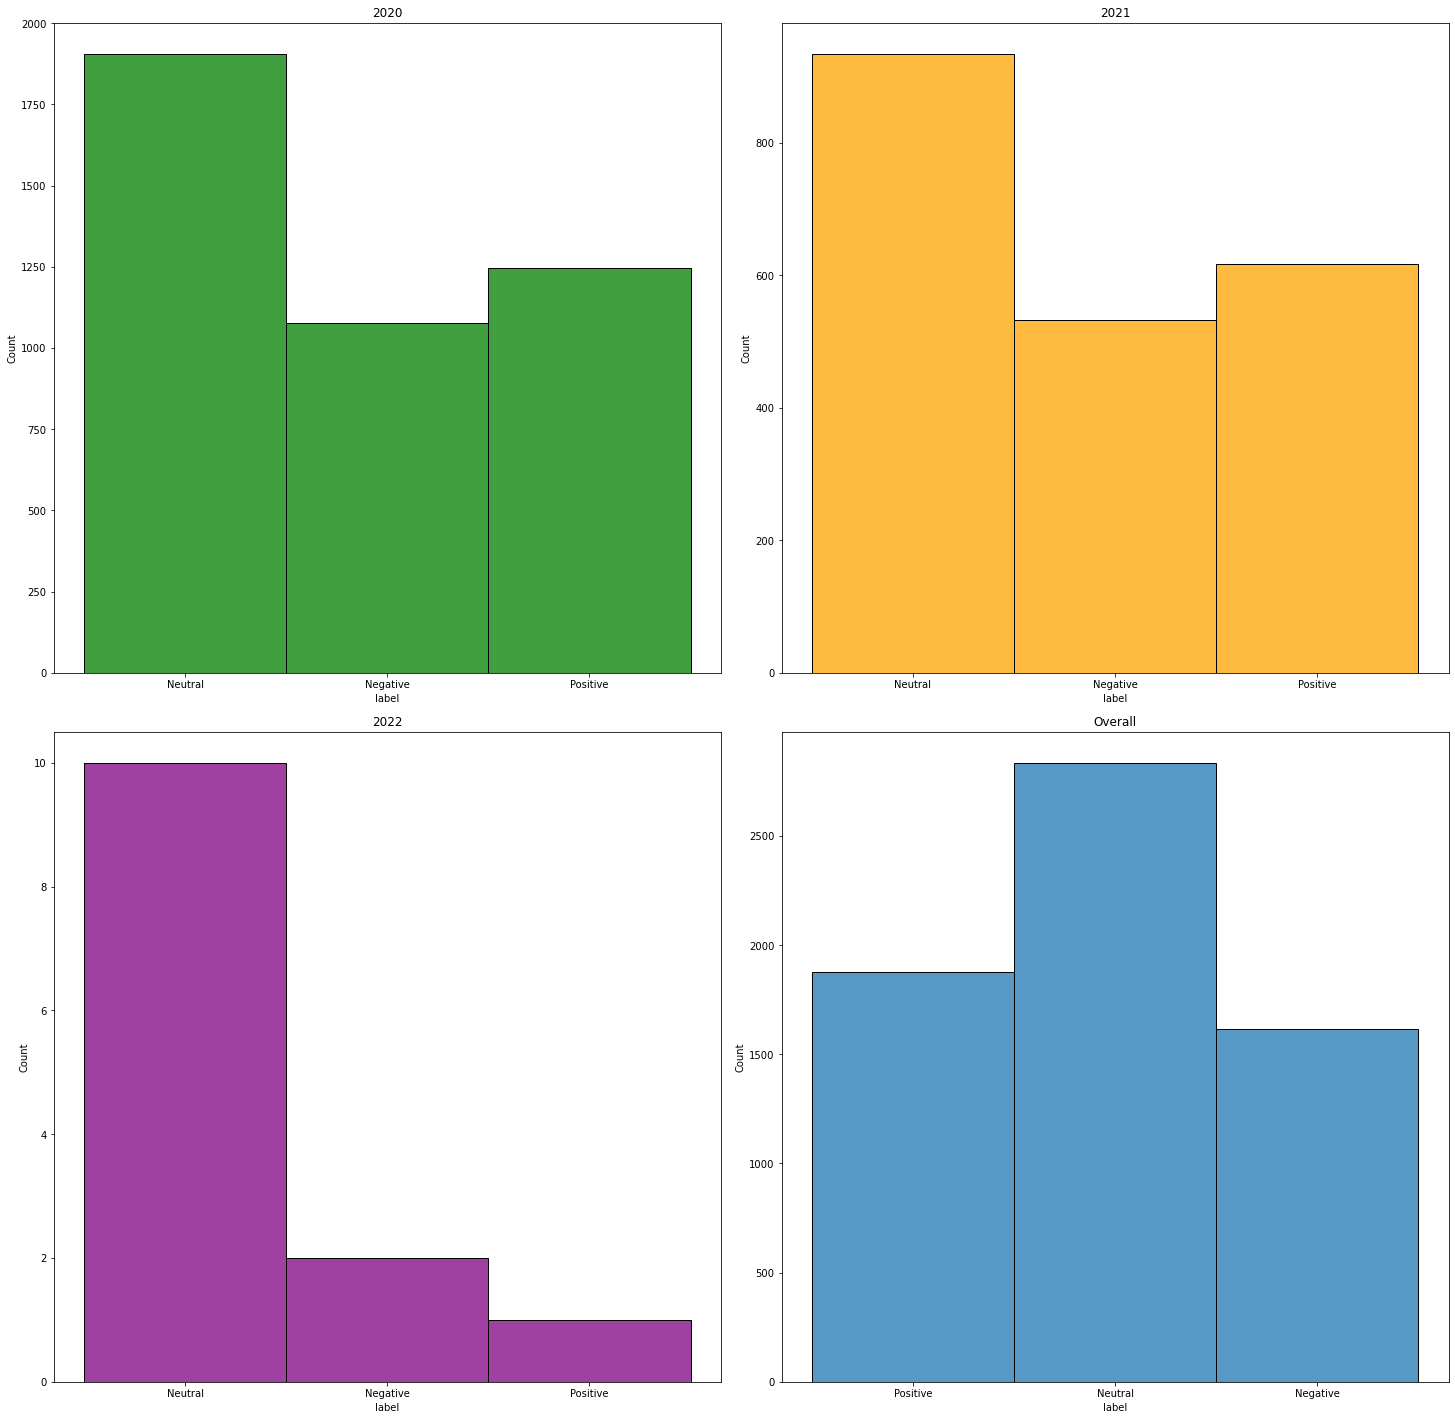

In [8]:
####PLOTTING#######

fig = plt.figure(figsize=(25, 25))
val_plot = fig.add_gridspec(4, 4)
ax0 = plt.subplot(val_plot[:2, :2])
ax1 = plt.subplot(val_plot[2:, :2])
ax2 = plt.subplot(val_plot[:2, 2:])
ax3 = plt.subplot(val_plot[2:, 2:])

sns.histplot(data=valorant_scored['label'],
            ax=ax0,color='green').set(title ='2020')
sns.histplot(data=valorant_scored1['label'],
            ax=ax2, color='orange').set(title = "2021")
sns.histplot(data=valorant_scored2['label'],
            ax=ax1,color='purple').set(title = '2022')
sns.histplot(data=valorant_scored3['label'],
            ax=ax3).set(title = 'Overall')

In [22]:
####Validation##

def news_title_output(valorant_scored3, label):
  res4 = valorant_scored3[valorant_scored3['label'] == label].title.values
  print(f'{"=" * 20}')
  print("\n".join(title for title in res4))

# randomly sample
news_sub = valorant_scored3.groupby('label').sample(n = 5, random_state = 42)

print("Positive Posts")
news_title_output(news_sub, "Positive")

print("\nNeutral Posts")
news_title_output(news_sub, "Neutral")

print("\nNegative Posts")
news_title_output(news_sub, "Negative")

Positive Posts
PLEASE stop smurfing from Diamond to Bronze - Silver - Gold.
Well ..
Can my account get banned if a friend of mine logs on it to play with me?
Interesting glitch after winning a game in Silver 3
TL Stewie boasting after a clean round

Neutral Posts
What do y'all do when you are bottom fragging?
5 man MOLLY ACE as brimstone!
What Did I Just Bump Into.. (Jett Dash Bug?)
Game keeps crashing after update 1.04
My experience as a Dad in VALORANT

Negative Posts
TIL bots can get stuck up there
Major Cypher Bug!! This one is making me crazy!
Learning to reload with Reyna the hard way...
Scammed By Riot Games
Disappointing Fails


In [10]:
####Word Clouds####
from PIL import Image

stop_words = stopwords.words('english')
tk = nltk.tokenize.RegexpTokenizer(r'\s+', gaps=True) # split on whitespace

def custom_tokenize(text):
  # remove single quote and dashes
  text = text.replace("'", "").replace("-", "").lower()

  # split on words only
  tk = nltk.tokenize.RegexpTokenizer(r'\w+')
  tokens = tk.tokenize(text)

  # remove stop words
  words = [w for w in tokens if not w in stop_words]
  return words

def tokens_2_words(valorant3, label):
  # subset titles based on label
  titles = valorant3[valorant3['label'] == label].title
  # apply our custom tokenize function to each title
  tokens = titles.apply(custom_tokenize)
  # join nested lists into a single list
  words = list(chain.from_iterable(tokens))
  return words

pos_words = tokens_2_words(valorant_scored3, 'Positive')
neg_words = tokens_2_words(valorant_scored3, 'Negative')

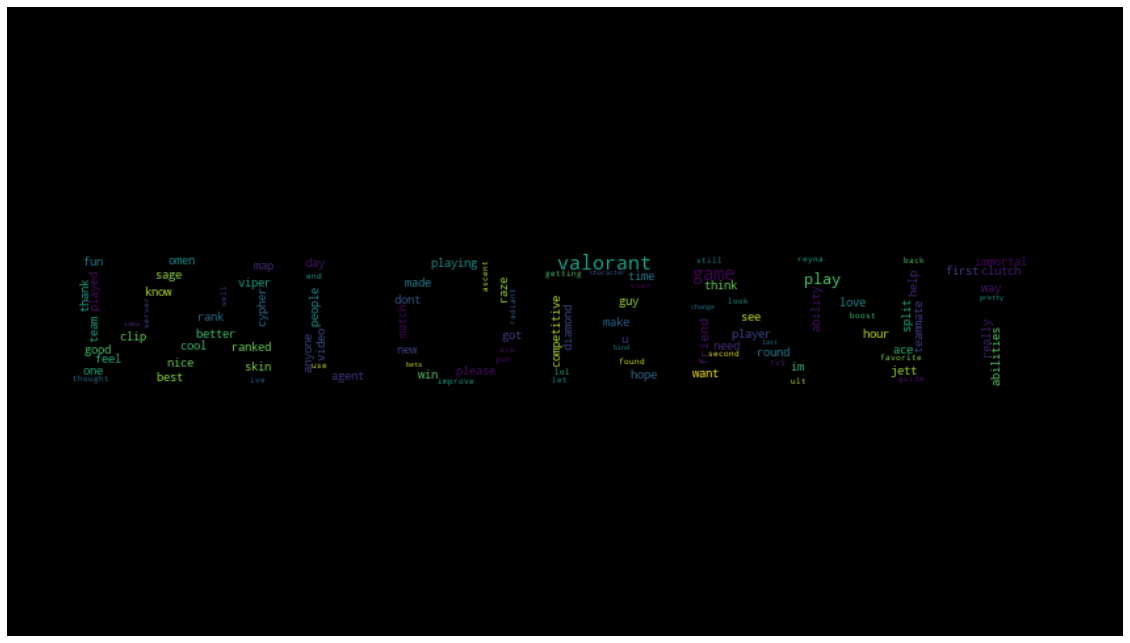

In [23]:
#Positive Wordcloud

pos_string = (" ").join(pos_words)
plt.figure(figsize=(20,20))
mask = np.array(Image.open("Valorant2.png"))
wordcloud = WordCloud(max_words = 100,mask=mask,colormap='viridis').generate(pos_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

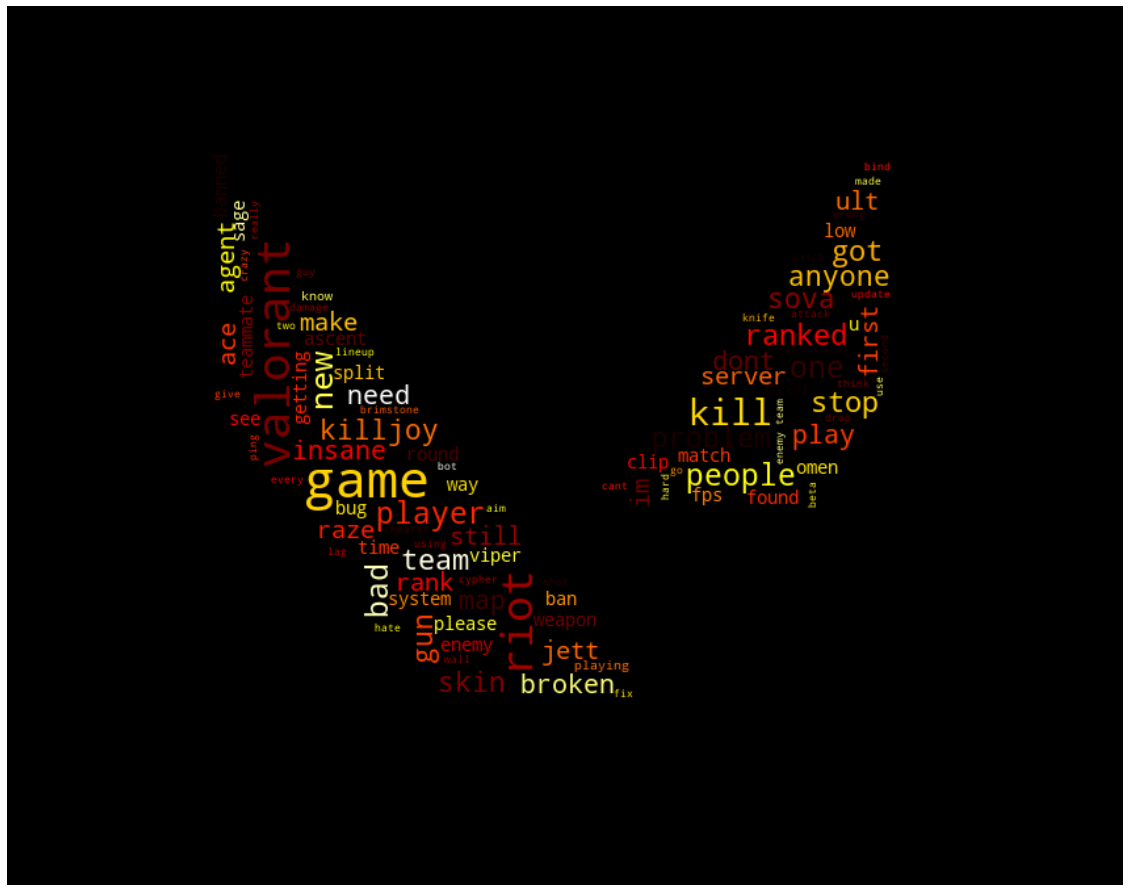

In [12]:
#Negative Wordcloud

neg_string = (" ").join(neg_words)

plt.figure(figsize=(20, 20))
mask = np.array(Image.open("valorant1.png"))
wordcloud2 = WordCloud(max_words = 100,mask=mask,contour_width=1,colormap='hot').generate(neg_string)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
###Agent Analysis###

Fade_DF = pd.read_csv("fadetweets.csv")

sid4 = SentimentIntensityAnalyzer()
res4 = [*Fade_DF['tweet'].apply(sid.polarity_scores)]

sentiment_df4 = pd.DataFrame.from_records(res4)
valorant_scored4 = pd.concat([Fade_DF, sentiment_df4], axis=1, join="inner")

THRESHOLD = 0.05

conditions = [
    (valorant_scored4['compound'] <= -THRESHOLD),
    (valorant_scored4['compound'] > -THRESHOLD) & (valorant_scored4['compound'] < THRESHOLD),
    (valorant_scored4['compound'] >= THRESHOLD)]

values4 = ["Negative", "Neutral", "Positive"]
valorant_scored4['label'] = np.select(conditions, values4)

print(valorant_scored4['label'].value_counts())

Neutral     527
Positive    311
Negative    178
Name: label, dtype: int64


[Text(0.5, 1.0, 'Fade Analysis')]

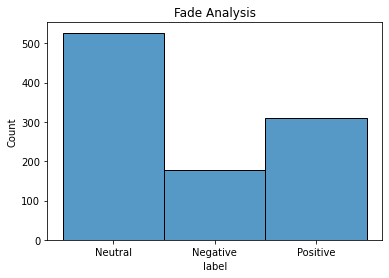

In [14]:
%matplotlib inline
sns.histplot(data=valorant_scored4['label']).set(title ='Fade Analysis')

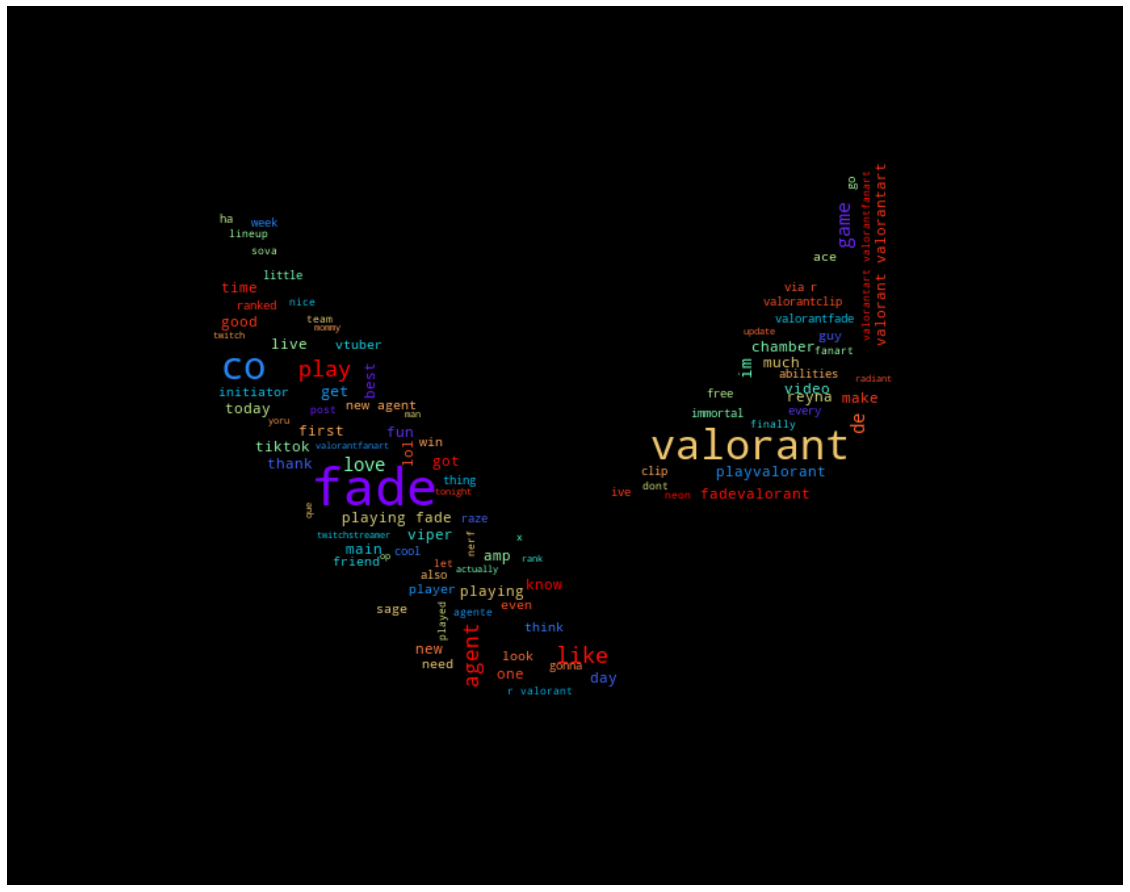

In [15]:
def tokens_4_words(valorant_scored4, label):
  # subset titles based on label
  titles = valorant_scored4[valorant_scored4['label'] == label].tweet
  # apply our custom tokenize function to each title
  tokens = titles.apply(custom_tokenize)
  # join nested lists into a single list
  words = list(chain.from_iterable(tokens))
  return words

fade_pos = tokens_4_words(valorant_scored4, 'Positive')

fade_string = (" ").join(fade_pos)

plt.figure(figsize=(20, 20))
mask = np.array(Image.open("valorant1.png"))
wordcloud = WordCloud(max_words = 100,mask=mask,contour_width=1,colormap='rainbow',stopwords=['https','http']).generate(fade_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

I think the biggest determining factor in how my analysis ended up is that Vader isn't necessarily tuned to know the specific game terminology.

This is probably why I got weird results or a lot of neutral.

Changing the threshold on the sentiment didn't really give me a different outcome

If I were to do this again, I'd classify a bunch of words manually.